In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import openpyxl as oxl
import SingleFocus_1 as sf1
import Dropper as dropper
import time as t
# experiment
import missingno as msno
# from pylab import rcParams
%matplotlib inline
# import everything needed

# Import everything that we need for this project for now:
## - The cell below is only for all the helper function

In [2]:
def grouping(df):
    """
    create a list of dataframes, each element of the list contains a dataframe
    that is grouped by ID
    """
    # convert the values from the projid to a list
    projid_list = df.projid.unique()
    projid_list = projid_list.tolist() #list acquired this is a unique list of ID

    list_of_patients = []
    counter_start_df_row = 0 # used for slicing the df, first
    counter_end_df_row   = 0 # used for slicing the df, last
    counter_flag_start   = 0 # "for loop" start index for df spliting based on unique ID
    df = df.reset_index(drop = True) # df reindexed

    # messy
    for p_id in projid_list: # loop through the unique id list
        for df_index in range(counter_flag_start, df.shape[0]): 
            if df.iloc[df_index]['projid'] == p_id:
                counter_end_df_row += 1
            elif df.iloc[df_index]['projid'] != p_id:
                break
        # print("List appended ===>>> " + str(p_id))
        list_of_patients.append(df[counter_start_df_row: counter_end_df_row])
        counter_start_df_row = counter_end_df_row
        counter_flag_start = counter_end_df_row

    # print (list_of_patients) #CHECKED
    return list_of_patients # a list of df, that each element of the list is one patient

def patient_analysis(list_of_patient_diagnosed, list_of_patient_not_diagnosed = None):
    """
    list = [df1, df2, df3 ...]
    Analysis DF on a patient based scale
    """
    temp_list_p_diagnosed = list_of_patient_diagnosed.copy()
    # example of heatMap =  SNS https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
    # heatmap matplot = https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
    """
    plan:
        . . .
    """
    interesting_attr = ['chlstrl',
                        'crn', 'gfr_mdrs', 'glucose',
                        'hba1c', 'hdlchlstrl',
                        'hdlratio',
                        'hemacrit',
                        'hemoglbn',
                        'ldlchlstrl',
                        'mch',
                        'mchc',
                        'mcv',
                        'platelet', 'rbc', 'dcfdx'] # some interesting attr
    # for patient in temp_list_p_diagnosed:
        
        

    # need to finish this tomorrow


def sort_patient(list_of_patient):
    """
    split the patient based of if the patient was diagnosed or not
    """
    list_of_patient_diagnosed = []      # with alzheimer
    list_of_patient_not_diagnosed = []  # without alzheimer
    diagonosed_flag = False

    for patient in list_of_patient:
        dcfdx_check_list = patient['dcfdx'].tolist()
        for dcfdx_element in dcfdx_check_list:
            if dcfdx_element >= 4: # >= 4 means diagnoised
                diagonosed_flag = True
                break
        if (diagonosed_flag) == True:
            list_of_patient_diagnosed.append(patient)
            diagonosed_flag = False
        else:
            list_of_patient_not_diagnosed.append(patient)
    
    return list_of_patient_diagnosed, list_of_patient_not_diagnosed

def output_table_xlsx(df, output_filename): # dataframe, string
    """
    helper function to output df back to xlsx
    to get a better view of all the columns
    """
    writer_excel = pd.ExcelWriter(output_filename + ".xlsx")
    df.to_excel(writer_excel, 'Sheet1')
    print ("file created")

# All the function imported
## The cell below is to load the dataset. While calling some function from the previous to group and sort the DF

In [8]:
path = '/Users/haominshi/Desktop/al_data/dataset_576_long.xlsx'
path_test = '/Users/haominshi/Desktop/al_data/dataset_testing_short.xlsx'
print ("Processing...")
timer_1 = t.time()
# =============================== Change path here
data_set_everything = sf1.openExcelSheet(path, sheet_name="Sheet0")
# data_set_everything = sf1.openExcelSheet(path_test, "Sheet1")
# ==========================================================================

# ==========================================================================
timer_1 = t.time() - timer_1
print (timer_1)
print (data_set_everything.shape)
print ("DF loaded")
# file transfered to DF
timer_1 = t.time()
# ==========================================================================
data_set_everything = dropper.drop_none_important_features(data_set_everything)
# drop none important features
data_set_everything = dropper.clean_history(data_set_everything)
# ==========================================================================
timer_1 = t.time() - timer_1
print(timer_1)
print(data_set_everything.shape)
data_set_cleaned = data_set_everything.copy() 
# the cleaned dataset's index is not droped
print("DF cleaned") 
# ==========================================================================
print("DF grouping")
timer_1 = t.time()
# list_of_patient = list of df based on each patient, each element of the list
# is a patient, and in that patient, we have the DF for each of their visit
list_of_patient = grouping(data_set_cleaned)
timer_1 = t.time() - timer_1
print(timer_1)
print("DF grouped dtype = list, total patient count is: " \
+ str(len(list_of_patient)))
# ==========================================================================
print("DF sorting")
timer_1 = t.time()

Processing...
32.05845594406128
(25570, 203)
DF loaded
0.8296451568603516
(3594, 123)
DF cleaned
DF grouping
1.2310051918029785
DF grouped dtype = list, total patient count is: 1189
DF sorting


In [9]:
# 2 very important asset, all the manipulation use these 2
list_of_patient_diagnosed, list_of_patient_not_diagnosed = \
sort_patient(list_of_patient) # return 2 list of patient, split by if diagnosed
print("2 list generated, diagnosed, and not diagnosed")
print("Amount of patient diagnosed = " + str(len(list_of_patient_diagnosed)))
print("Amount of patient not diagnosed = " + str(len(list_of_patient_not_diagnosed)))
# ==========================================================================
# print (list_of_patient_diagnosed)
# output_table_xlsx(data_set_cleaned,"output_cleaned_dataSet")
# from column [66:] is boolean value [1,0]
patient_analysis(list_of_patient_diagnosed)

2 list generated, diagnosed, and not diagnosed
Amount of patient diagnosed = 271
Amount of patient not diagnosed = 918


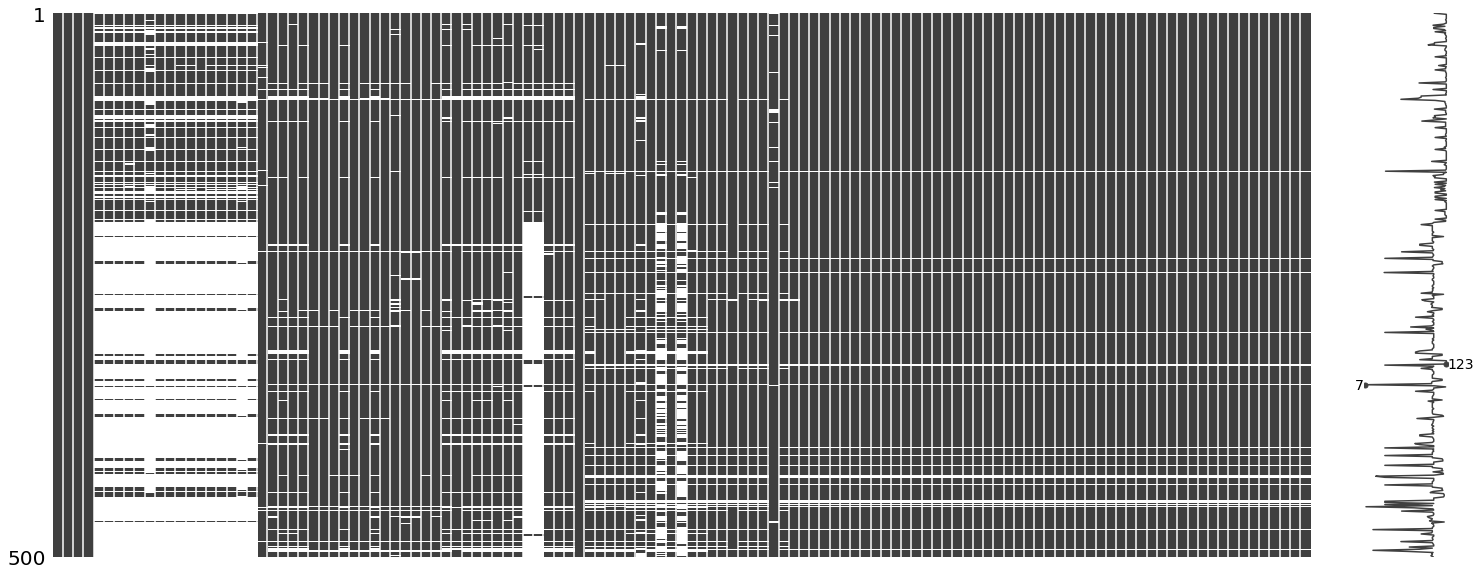

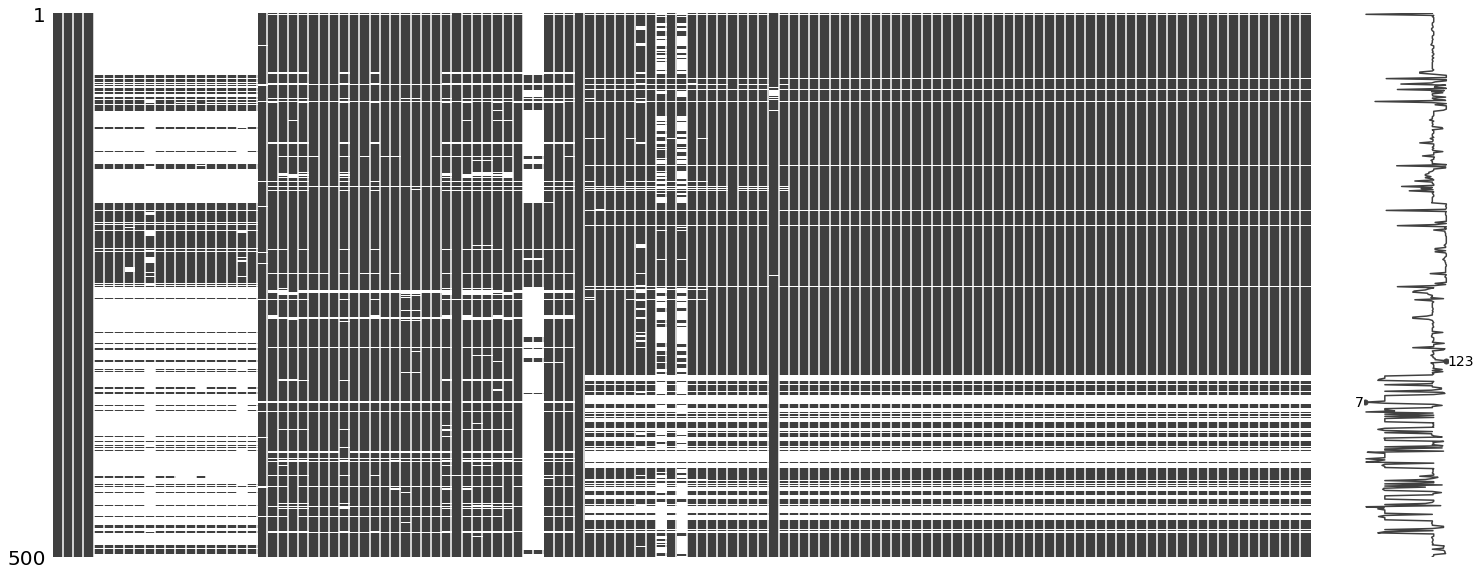

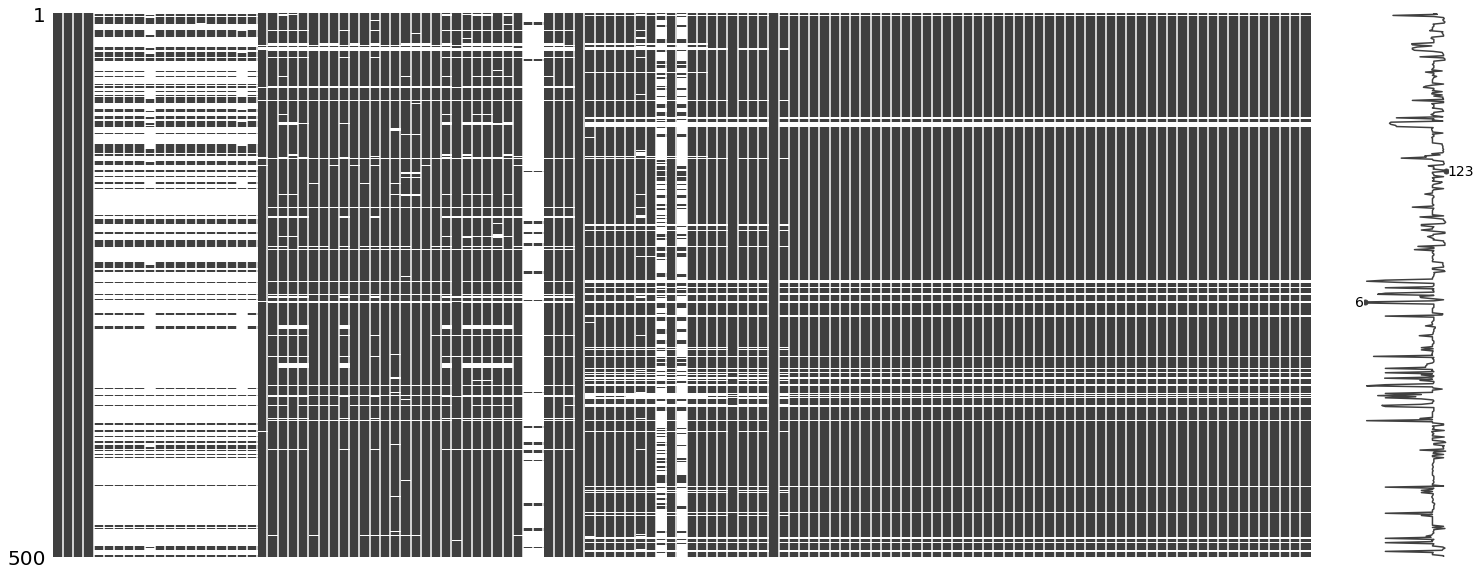

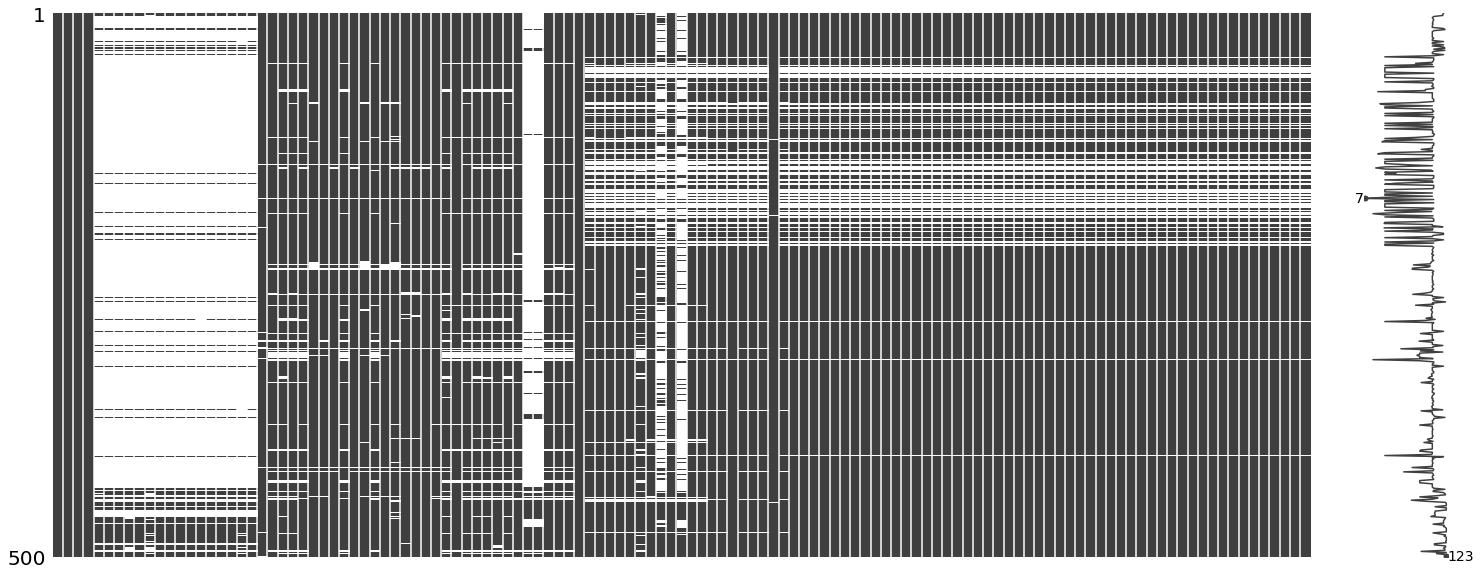

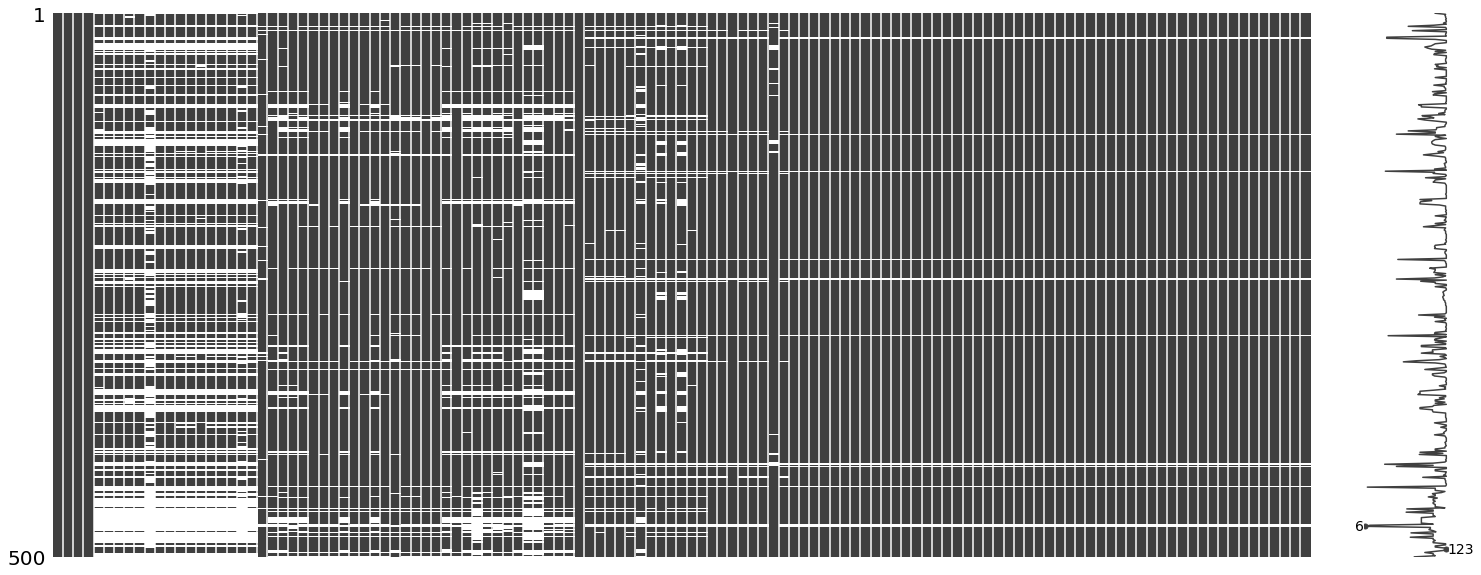

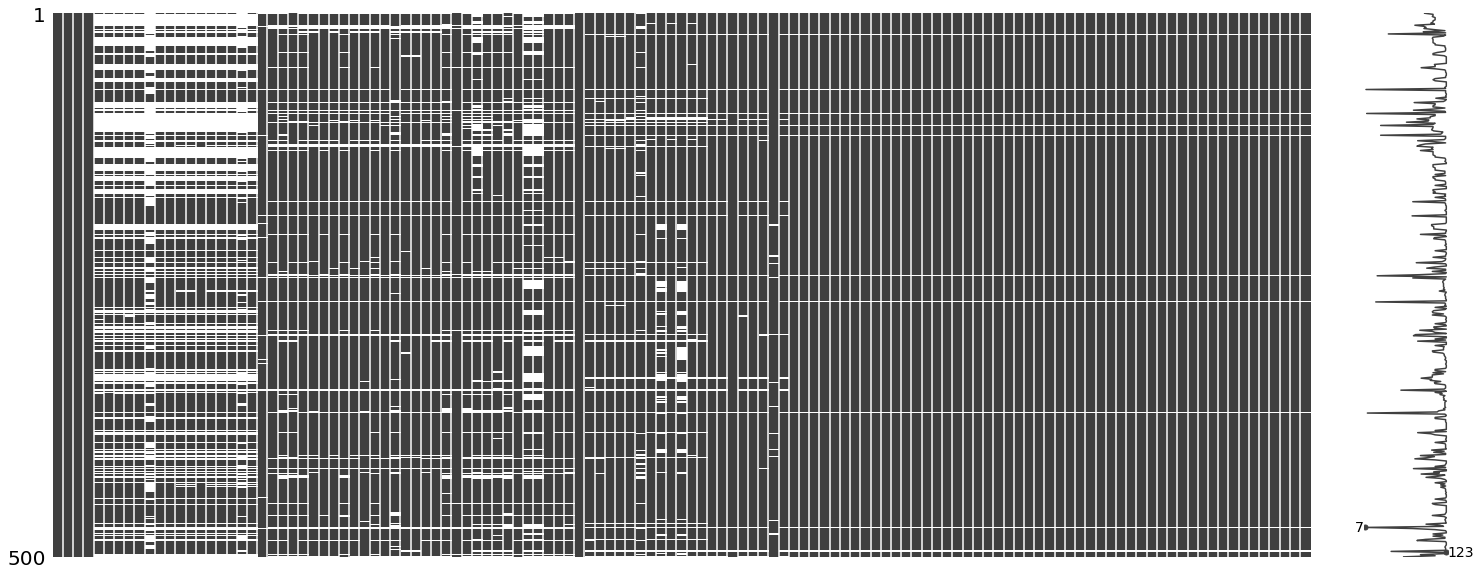

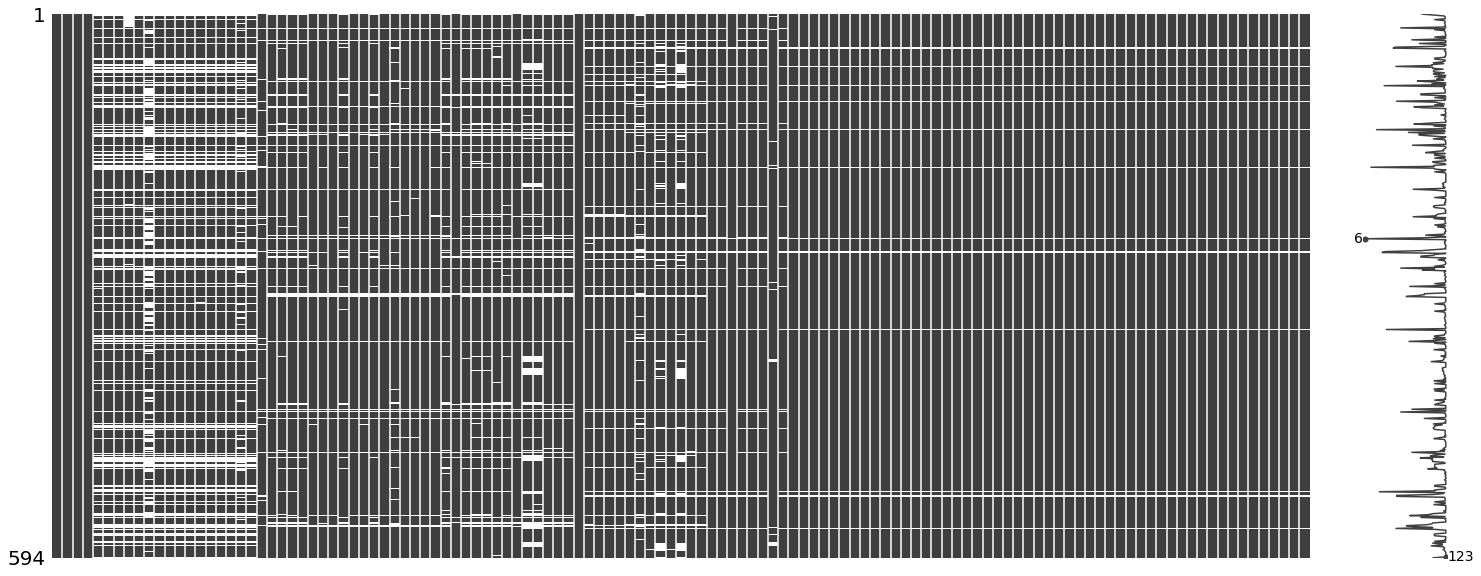

In [11]:
msno.matrix(data_set_cleaned[:500]) # visualize the missing data
msno.matrix(data_set_cleaned[500:1000]) 
msno.matrix(data_set_cleaned[1000:1500])
msno.matrix(data_set_cleaned[1500:2000])
msno.matrix(data_set_cleaned[2000:2500])
msno.matrix(data_set_cleaned[2500:3000])
msno.matrix(data_set_cleaned[3000:])

# Run the above main to load the dataset:

#### NOTE:
###### 1. data_set_cleaned # this is a DF
###### 2. list_of_patient_diagnosed # this is a list of DF
###### 3. list_of_patient_not_diagnosed # this is a list of DF